In [4]:
# import torch
# import torchvision.transforms as tvt
# from torch.utils.data import DataLoader
# from tqdm import tqdm
import shutil
import pandas as pd
import numpy as np
import os
# torch.manual_seed(1234)
from evaluate_metrics import compute_eer
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

/home/woonj/anaconda3/envs/asvspoof5/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# load dev set
# load protocol file
eval_df = pd.read_csv("/home/woonj/asvspoof5/DATA/ASVspoof5.dev.metadata.txt",sep=" ", header=None )
# eval_df['-'] = '-'
# eval_df.head()
# eval_df = eval_df[[0,1,'-',2]]
# eval_df.head()
eval_df.columns = ["utt","filename", "gender", "-",'attack','label']
# #eval_df = eval_df[eval_df['utt'].str.contains("LA_E")]
eval_df.head()

,utt,filename,gender,-,attack,label
0,D_0062,D_0000000001,F,-,A11,spoof
1,D_0755,D_0000000022,F,-,A16,spoof
2,D_0106,D_0000000043,M,-,A15,spoof
3,D_5368,D_0000000064,M,-,A12,spoof
4,D_3166,D_0000000085,M,-,A15,spoof


In [3]:
dev_df = pd.DataFrame({'utt':eval_df['filename'],'attack':eval_df['attack'],'label':eval_df['label']})
dev_df.head()

,utt,attack,label
0,D_0000000001,A11,spoof
1,D_0000000022,A16,spoof
2,D_0000000043,A15,spoof
3,D_0000000064,A12,spoof
4,D_0000000085,A15,spoof


In [4]:
# eval_df.iloc[:, 0] = eval_df.iloc[:, 0].str.split('/').str[1]
# eval_df.head()

In [5]:
pred_df = pd.read_csv("/home/woonj/asvspoof5/TEST2.txt", sep=" ", header=None)
pred_df.columns = ["utt", "spoof","bonafide"]
pred_df.head()

,utt,spoof,bonafide
0,flac_D/D_0000000190.flac,-0.897373,-0.523639
1,flac_D/D_0000000253.flac,-5.032175,-0.006546
2,flac_D/D_0000000631.flac,-3.293413,-0.037834
3,flac_D/D_0000000715.flac,-0.547245,-0.864034
4,flac_D/D_0000000736.flac,-2.715603,-0.068456


In [6]:
pred_df.iloc[:, 0] = pred_df.iloc[:, 0].str.split('/').str[1]
pred_df.head()

,utt,spoof,bonafide
0,D_0000000190.flac,-0.897373,-0.523639
1,D_0000000253.flac,-5.032175,-0.006546
2,D_0000000631.flac,-3.293413,-0.037834
3,D_0000000715.flac,-0.547245,-0.864034
4,D_0000000736.flac,-2.715603,-0.068456


In [7]:
pred_df.iloc[:, 0] = pred_df.iloc[:, 0].str.split('.').str[0]
pred_df.head()

,utt,spoof,bonafide
0,D_0000000190,-0.897373,-0.523639
1,D_0000000253,-5.032175,-0.006546
2,D_0000000631,-3.293413,-0.037834
3,D_0000000715,-0.547245,-0.864034
4,D_0000000736,-2.715603,-0.068456


In [8]:
res_df = pd.merge(dev_df, pred_df, on='utt')
print(res_df.head())

            utt attack  label     spoof  bonafide
0  D_0000000001    A11  spoof -0.038921 -3.265606
1  D_0000000022    A16  spoof -0.209053 -1.667876
2  D_0000000043    A15  spoof -0.068014 -2.721849
3  D_0000000064    A12  spoof -4.706418 -0.009078
4  D_0000000085    A15  spoof -0.175611 -1.826005


In [9]:
spoof_scores = res_df[res_df['label'] == 'spoof']['bonafide']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['bonafide']

In [10]:
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))

EER: 16.2225%, threshold: -0.5312


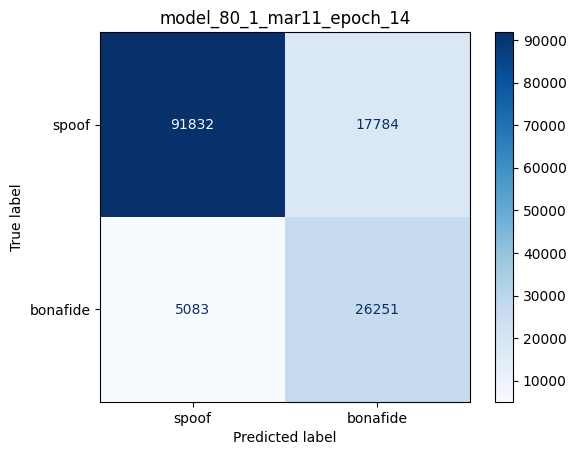

In [11]:
res_df['pred'] = res_df['bonafide'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# print(res_df.head)

# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Blues', values_format='g')
plt.title("model_80_1_mar11_epoch_14")
plt.show()


In [12]:
scores = []
for score in res_df['bonafide']:
    scores.append(score)

In [13]:
scores

[-3.26560640335083,
 -1.6678755283355713,
 -2.721848726272583,
 -0.0090781785547733,
 -1.8260047435760496,
 -3.513621091842652,
 -2.9730653762817383,
 -0.0080242408439517,
 -6.756124496459961,
 -0.5236393213272095,
 -4.41750431060791,
 -6.695997714996338,
 -0.0065460060723125,
 -3.1169865131378174,
 -5.347235202789307,
 -5.14822244644165,
 -0.0055966828949749,
 -2.36037278175354,
 -0.7023658156394958,
 -4.931058406829834,
 -2.599635124206543,
 -3.990448474884033,
 -4.2841620445251465,
 -1.6023238897323608,
 -6.304617404937744,
 -1.417311191558838,
 -0.0034026363864541,
 -6.48646879196167,
 -1.2285717725753784,
 -1.9751008749008176,
 -0.0378336794674396,
 -4.565335273742676,
 -7.209199905395508,
 -4.694376468658447,
 -0.8640338778495789,
 -0.0684555247426033,
 -6.1077985763549805,
 -5.446969509124756,
 -0.007658761460334,
 -2.389188289642334,
 -0.4003871083259582,
 -0.0016186243155971,
 -0.512426495552063,
 -0.1679531931877136,
 -3.248355865478516,
 -4.165676593780518,
 -6.7114005088806

In [14]:
keys = []
for key in res_df['label']:
    if key == 'spoof':
        keys.append('spoof')  # 'target' labeling
    else:
        keys.append('target')

In [15]:
keys

['spoof',
 'spoof',
 'spoof',
 'spoof',
 'spoof',
 'spoof',
 'spoof',
 'spoof',
 'spoof',
 'target',
 'spoof',
 'spoof',
 'target',
 'spoof',
 'spoof',
 'spoof',
 'spoof',
 'spoof',
 'spoof',
 'spoof',
 'spoof',
 'spoof',
 'spoof',
 'spoof',
 'spoof',
 'spoof',
 'spoof',
 'spoof',
 'spoof',
 'spoof',
 'target',
 'spoof',
 'spoof',
 'spoof',
 'target',
 'target',
 'spoof',
 'spoof',
 'spoof',
 'spoof',
 'spoof',
 'target',
 'spoof',
 'target',
 'spoof',
 'spoof',
 'spoof',
 'spoof',
 'spoof',
 'spoof',
 'spoof',
 'spoof',
 'target',
 'target',
 'target',
 'spoof',
 'spoof',
 'spoof',
 'spoof',
 'spoof',
 'spoof',
 'spoof',
 'spoof',
 'target',
 'spoof',
 'spoof',
 'spoof',
 'spoof',
 'target',
 'spoof',
 'spoof',
 'target',
 'spoof',
 'spoof',
 'target',
 'spoof',
 'spoof',
 'spoof',
 'spoof',
 'spoof',
 'spoof',
 'spoof',
 'spoof',
 'spoof',
 'spoof',
 'target',
 'spoof',
 'target',
 'spoof',
 'target',
 'spoof',
 'spoof',
 'spoof',
 'spoof',
 'target',
 'spoof',
 'spoof',
 'spoof',
 '

In [16]:
print(len(scores))
print(len(keys))

140950
140950


In [5]:
from a_DCF.a_dcf.a_dcf import calculate_a_dcf_CM

In [18]:
aDCF = calculate_a_dcf_CM(np.array(scores), np.array(keys))

nontarget scores are missing, adding dummy values for testing.
a-DCF: 0.33094, threshold: -0.84718
CostModel(Pspf=0.05, Pnontrg=0.05, Ptrg=0.9, Cmiss=1, Cfa_asv=10, Cfa_cm=20)


In [ ]:
# load score file
# pred_df = pd.read_csv("/home/woonj/asvspoof5/TEST2.txt", sep=" ", header=None)
# pred_df.columns = ["utt", "spoof","bonafide"]
# pred_df['utt'] = pred_df['utt'].str.replace('.flac', '')
# print(pred_df.head())
# pred_df['pred'] = pred_df['pred'].apply(lambda x: 'bonafide' if x == 1 else 'spoof')
# pred_df['pred'] = pred_df['score'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# pred_df['utt'] = pred_df['utt'].apply(lambda x: x.split('.')[0])
# print(pred_df.head)
# merge eval_df and pred_df on utt
res_df = pd.merge(eval_df, pred_df, on='utt')
print(res_df.head())

print(len(res_df))

# compute EER
spoof_scores = res_df[res_df['label'] == 'spoof']['bonafide']
bonafide_scores = res_df[res_df['label'] == 'bonafide']['bonafide']
# print(bonafide_scores.head)
eer, threshold = compute_eer(bonafide_scores, spoof_scores)
print("EER: {:.4f}%, threshold: {:.4f}".format(eer*100, threshold))
res_df['pred'] = res_df['bonafide'].apply(lambda x: 'spoof' if x < threshold else 'bonafide')
# print(res_df.head)
# confusion matrix
cm = confusion_matrix(res_df["label"], res_df["pred"], labels=["spoof","bonafide"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spoof","bonafide"])
disp.plot(cmap='Blues', values_format='g')
plt.title("model_80_1_mar11_epoch_14")
# plt.savefig("figs/ori_assl_cm.png", dpi=300)
plt.show()


In [ ]:
# #오탐된 샘플만 골라내기
# filtered_data = res_df[((res_df['label'] == 'spoof') & (res_df['pred'] == 'bonafide')) | ((res_df['label'] == 'bonafide') & (res_df['pred'] == 'spoof'))]
# contains_tts_mask = filtered_data['utt'].str.contains('TTS', case=False, na=False)

# real_sample = filtered_data[~contains_tts_mask]
# print("real sample:",len(real_sample))

# contains_LJ_mask = real_sample['utt'].str.contains('LJ',case=False, na=False)

# LJ_sample = real_sample[contains_LJ_mask]
# real_sample = real_sample[~contains_LJ_mask]
# print("LJSpeech:",len(LJ_sample))

# contains_VCTK_mask = real_sample['utt'].str.contains("p",case = False, na = False)

# VCTK_sample = real_sample[contains_VCTK_mask]
# print("VCTK:",len(VCTK_sample))

# Libri_sample = real_sample[~contains_VCTK_mask]
# print("Libri:",len(Libri_sample))

# print()

# fake_sample = filtered_data[contains_tts_mask]
# print("fake sample:",len(fake_sample))

# contains_VITS_mask = fake_sample['utt'].str.contains('VITS', case=False, na=False)

# VITS_sample = fake_sample[contains_VITS_mask]
# fake_sample = fake_sample[~contains_VITS_mask]
# print("VITS:",len(VITS_sample))

# contains_StyleTTS2_mask = fake_sample['utt'].str.contains('16k', case=False, na=False)

# StyleTTS2_sample = fake_sample[contains_StyleTTS2_mask]
# fake_sample = fake_sample[~contains_StyleTTS2_mask]
# print("StyleTTS2:",len(StyleTTS2_sample))

# contains_Mellow_mask = fake_sample['utt'].str.contains('Mellow', case=False, na=False)

# Mellow_sample = fake_sample[contains_Mellow_mask]
# print("MellowTTS:",len(Mellow_sample))

In [ ]:
a = [[0,1],[0,6],[0,5],[0,4],[0,3],[0,2]]
for i in a:
    with open('output.txt', 'a') as f:
        f.write(f"{i}\n")

In [ ]:
import pandas as pd
lines = pd.read_csv('output.txt', sep=" ", header = None)
lines.columns = ['target','nontarget']
for target, nontarget in zip(lines['target'], lines['nontarget']):
    print(target)
    print(nontarget)

In [ ]:
import pandas as pd
lines = pd.read_csv('/home/woonj/asvspoof5/ECAPA-TDNN/veri_test2.txt',sep=" ",header=None)
lines.columns = ['label','target','nontarget']
id_df = lines['target']
id_df = id_df.tolist()
for i in range(len(id_df)):
    id_df[i] = id_df[i].split('/')[0]
print(id_df)

In [3]:
meta_df = pd.read_csv('/home/woonj/asvspoof5/DATA/meta.csv')

In [4]:
# 특정 화자 ID를 기준으로 데이터 선택
spid = 'T_4850'
speaker_data = meta_df[meta_df['spid'] == spid]

In [6]:
print(meta_df.head())
print(meta_df.info())

     spid           utt gender codec attack  label subset  duration       sr  \
0  T_4850  T_0000000000      F     -    A05  spoof  train     8.896  16000.0   
1  T_0858  T_0000000001      M     -    A07  spoof  train     7.344  16000.0   
2  T_4075  T_0000000002      M     -    A04  spoof  train    10.832  16000.0   
3  T_0938  T_0000000003      M     -    A08  spoof  train    13.024  16000.0   
4  T_0610  T_0000000004      M     -    A05  spoof  train    15.456  16000.0   

                       path  
0  flac_T/T_0000000000.flac  
1  flac_T/T_0000000001.flac  
2  flac_T/T_0000000002.flac  
3  flac_T/T_0000000003.flac  
4  flac_T/T_0000000004.flac  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323307 entries, 0 to 323306
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   spid      323307 non-null  object 
 1   utt       323307 non-null  object 
 2   gender    323307 non-null  object 
 3   codec     323307 non-nu

In [8]:
# 타겟 데이터 (진본)
target_data = meta_df[meta_df['label'] == 'bonafide']

# 비타겟 데이터 (다른 화자 진본)
nontarget_data = meta_df[(meta_df['label'] == 'bonafide') & (meta_df['spid'] != 'target_spid')]  # target_spid를 실제 타겟 화자 ID로 변경

# 스푸핑 데이터
spoof_data = meta_df[meta_df['label'] == 'spoof']



In [9]:
print("Target Data:")
print(target_data.head())

print("Non-target Data:")
print(nontarget_data.head())

print("Spoof Data:")
print(spoof_data.head())

Target Data:
      spid           utt gender codec    attack     label subset  duration  \
11  T_3734  T_0000000011      F     -  bonafide  bonafide  train     19.95   
19  T_2386  T_0000000019      M     -  bonafide  bonafide  train     16.58   
21  T_2498  T_0000000021      M     -  bonafide  bonafide  train     13.96   
28  T_0975  T_0000000028      M     -  bonafide  bonafide  train     13.34   
49  T_3567  T_0000000049      F     -  bonafide  bonafide  train     19.94   

         sr                      path  
11  16000.0  flac_T/T_0000000011.flac  
19  16000.0  flac_T/T_0000000019.flac  
21  16000.0  flac_T/T_0000000021.flac  
28  16000.0  flac_T/T_0000000028.flac  
49  16000.0  flac_T/T_0000000049.flac  
Non-target Data:
      spid           utt gender codec    attack     label subset  duration  \
11  T_3734  T_0000000011      F     -  bonafide  bonafide  train     19.95   
19  T_2386  T_0000000019      M     -  bonafide  bonafide  train     16.58   
21  T_2498  T_0000000021   

In [10]:
print(target_data.shape)
print(nontarget_data.shape)
print(spoof_data.shape)

(50131, 10)
(50131, 10)
(273176, 10)


In [11]:
# First, we need some functions to compute EER and sasv-eer

def compute_det_curve(target_scores, nontarget_scores):
    """
    frr, far, thr = compute_det_curve(target_scores, nontarget_scores)

    input
    -----
      target_scores:    np.array, target trial scores
      nontarget_scores: np.array, nontarget trial scores

    output
    ------
      frr:   np.array, FRR, (#N, ), where #N is total number of scores + 1
      far:   np.array, FAR, (#N, ), where #N is total number of scores + 1
      thr:   np.array, threshold, (#N, )

    """

    n_scores = target_scores.size + nontarget_scores.size
    all_scores = np.concatenate((target_scores, nontarget_scores))
    labels = np.concatenate((np.ones(target_scores.size),
                             np.zeros(nontarget_scores.size)))

    # Sort labels based on scores
    indices = np.argsort(all_scores, kind='mergesort')
    labels = labels[indices]

    # Compute false rejection and false acceptance rates
    tar_trial_sums = np.cumsum(labels)
    nontarget_trial_sums = (nontarget_scores.size -
                            (np.arange(1, n_scores + 1) - tar_trial_sums))

    frr = np.concatenate((np.atleast_1d(0), tar_trial_sums/target_scores.size))
    # false rejection rates
    far = np.concatenate((np.atleast_1d(1),
                          nontarget_trial_sums / nontarget_scores.size))
    # false acceptance rates
    thresholds = np.concatenate((np.atleast_1d(all_scores[indices[0]] - 0.001),
                                 all_scores[indices]))
    # Thresholds are the sorted scores
    return frr, far, thresholds


def compute_eer(target_scores, nontarget_scores):
    """
    eer, eer_threshold = compute_eer(target_scores, nontarget_scores)

    input
    -----
      target_scores:    np.array, or list of np.array, target trial scores
      nontarget_scores: np.array, or list of np.array, nontarget trial scores

    output
    ------
      eer:            float, EER
      eer_threshold:  float, threshold corresponding to EER

    """
    if type(target_scores) is list and type(nontarget_scores) is list:
        frr, far, thr = compute_det_curve_sets(target_scores, nontarget_scores)
    else:
        frr, far, thr = compute_det_curve(target_scores, nontarget_scores)

    # find the operation point for EER
    abs_diffs = np.abs(frr - far)
    min_index = np.argmin(abs_diffs)

    # compute EER
    eer = np.mean((frr[min_index], far[min_index]))
    return eer, thr[min_index]


def compute_sasv_eer(scores, labels, tar_label = 1, nontar_label = 2, spoof_label = 0):
    """save_eer = compute_sasv_eer(scores, labels)

    input
    -----
      scores:    np.array, (N, ), fused scores for SASV
      labels:    np.array, (N, ), labels

    output
    ------
      save_eer:  float, SASV-EER
    """
    print(type(np.where(labels == tar_label)))
    print(np.where(labels == tar_label))
    tar_scores = scores[np.where(labels == tar_label)]
    other_scores = scores[np.where(labels != tar_label)]
    nontar_scores = scores[np.where(labels == nontar_label)]
    spoof_scores = scores[np.where(labels == spoof_label)]

    sasv_eer, sasv_thr = compute_eer(tar_scores, other_scores)
    return sasv_eer, sasv_thr

In [3]:
import pandas as pd

In [19]:
sasv_score_path = '/home/woonj/asvspoof5/score_file/dev_asv_cm_score_nollr_calibrate.csv'
sasv_score_df = pd.read_csv(sasv_score_path, sep=",", header=None)
sasv_score_df.columns = ["spid", "utt", "cm","asv", "label","sasv"]
scores  = sasv_score_df['sasv'].to_numpy()
keys = sasv_score_df['label'].to_numpy()

In [21]:
labels = sasv_score_df['label']
num_label = []
for i in labels:
    if i=='target':
        num_label.append(1)
    elif i=='nontarget':
        num_label.append(2)
    else:
        num_label.append(0)
sasv_score_df['num_label'] = num_label
label  = sasv_score_df['num_label'].to_numpy()

In [8]:
from a_DCF.a_dcf.a_dcf import calculate_a_dcf
import numpy as np
# aDCF = calculate_a_dcf(scores,keys)

In [27]:
eer_tmp, eer_thre = compute_sasv_eer(scores, label)
print('SASV-EER: {:.2f}%'.format(eer_tmp * 100))
print(eer_thre)

SASV-EER: 1.80%
2.7724741858973383


In [29]:
sasv_score_path = '/home/woonj/asvspoof5/score_file/dev_asv_cm_linear_score.csv'
sasv_score_df = pd.read_csv(sasv_score_path, sep=",", header=None)
sasv_score_df.columns = ["spid", "utt", "cm","asv", "label","sasv"]
scores  = sasv_score_df['sasv'].to_numpy()
keys = sasv_score_df['label'].to_numpy()
labels = sasv_score_df['label']
num_label = []
for i in labels:
    if i=='target':
        num_label.append(1)
    elif i=='nontarget':
        num_label.append(2)
    else:
        num_label.append(0)
sasv_score_df['num_label'] = num_label
label  = sasv_score_df['num_label'].to_numpy()
aDCF = calculate_a_dcf(scores,keys)
eer_tmp, eer_thre = compute_sasv_eer(scores, label)
print('SASV-EER: {:.2f}%'.format(eer_tmp * 100))
print(eer_thre)

a-DCF: 0.03346, threshold: 3.24182
CostModel(Pspf=0.05, Pnontrg=0.05, Ptrg=0.9, Cmiss=1, Cfa_asv=10, Cfa_cm=20)
SASV-EER: 1.83%
1.7448408574393763


In [30]:
sasv_score_path = '/home/woonj/asvspoof5/score_file/dev_asv_cm_nonlinear_score.csv'
sasv_score_df = pd.read_csv(sasv_score_path, sep=",", header=None)
sasv_score_df.columns = ["spid", "utt", "cm","asv", "label","sasv"]
scores  = sasv_score_df['sasv'].to_numpy()
keys = sasv_score_df['label'].to_numpy()
labels = sasv_score_df['label']
num_label = []
for i in labels:
    if i=='target':
        num_label.append(1)
    elif i=='nontarget':
        num_label.append(2)
    else:
        num_label.append(0)
sasv_score_df['num_label'] = num_label
label  = sasv_score_df['num_label'].to_numpy()
aDCF = calculate_a_dcf(scores,keys)
eer_tmp, eer_thre = compute_sasv_eer(scores, label)
print('SASV-EER: {:.2f}%'.format(eer_tmp * 100))
print(eer_thre)

a-DCF: 0.03354, threshold: 3.55682
CostModel(Pspf=0.05, Pnontrg=0.05, Ptrg=0.9, Cmiss=1, Cfa_asv=10, Cfa_cm=20)
SASV-EER: 1.83%
2.2802427087450834


In [9]:
sasv_score_path = '/home/woonj/asvspoof5/score_file/dev_wj_asv_cm_score_label_1.csv'
sasv_score_df = pd.read_csv(sasv_score_path, sep=" ", header=None)
sasv_score_df.columns = ["utt", "asv","cm", "spid","label"]
asv_scores  = sasv_score_df['asv'].to_numpy()
cm_scores = sasv_score_df['cm'].to_numpy()
keys = sasv_score_df['label'].to_numpy()
num_label = []
for i in keys:
    if i=='target':
        num_label.append(1)
    elif i=='nontarget':
        num_label.append(2)
    else:
        num_label.append(0)
sasv_score_df['num_label'] = num_label
sasv_scores = asv_scores + cm_scores
aDCF = calculate_a_dcf(sasv_scores,keys)
eer_tmp, eer_thre = compute_sasv_eer(np.array(sasv_scores), num_label)
print('SASV-EER: {:.2f}%'.format(eer_tmp * 100))
print(eer_thre)

a-DCF: 0.02873, threshold: 0.42790
CostModel(Pspf=0.05, Pnontrg=0.05, Ptrg=0.9, Cmiss=1, Cfa_asv=10, Cfa_cm=20)
SASV-EER: nan%
-11.67155316169739


/tmp/ipykernel_4083779/2814077669.py:34: RuntimeWarning: invalid value encountered in divide
  frr = np.concatenate((np.atleast_1d(0), tar_trial_sums/target_scores.size))


In [35]:
asv_scores = []
cm_scores = []
sasv_scores = []
sasv_labels = []
sasv_eer_lab = []
lines = open('/home/woonj/asvspoof5/score_file/dev_wj_asv_cm_score_label_1.csv').read().splitlines()
for line in lines:
    parts = line.split(' ')
    asv_scores.append(float(parts[1]))
    cm_scores.append(float(parts[2]))
    # sasv_scores.append(float(parts[5]))
    sasv_scores.append(float(parts[1]) + float(parts[2]))
    # cm_labels에 조건에 맞게 저장
    if parts[4]=='target':
        sasv_labels.append('target')
        sasv_eer_lab.append(1)
    elif parts[4]=='nontarget':
        sasv_labels.append('nontarget')
        sasv_eer_lab.append(0)
    else:
        sasv_labels.append('nontarget')
        sasv_eer_lab.append(0)
    

In [34]:
# print(sasv_eer_lab)
print(type(sasv_scores))

<class 'list'>


In [36]:
aDCF = calculate_a_dcf(np.array(sasv_scores),np.array(sasv_labels))
eer_tmp, eer_thre = compute_sasv_eer(np.array(sasv_scores), np.array(sasv_eer_lab))
print('SASV-EER: {:.2f}%'.format(eer_tmp * 100))
print(eer_thre)

Spoof scores are missing, adding dummy values for testing.
a-DCF: 0.02278, threshold: 0.39232
CostModel(Pspf=0.05, Pnontrg=0.05, Ptrg=0.9, Cmiss=1, Cfa_asv=10, Cfa_cm=20)
<class 'tuple'>
(array([    12,     35,     46, ..., 282439, 282444, 282449]),)
SASV-EER: 1.54%
0.36629877175573344


In [38]:
aDCF = calculate_a_dcf(np.array(asv_scores),np.array(sasv_labels))
eer_tmp, eer_thre = compute_sasv_eer(np.array(asv_scores), np.array(sasv_eer_lab))
print('ASV-EER: {:.2f}%'.format(eer_tmp * 100))
print(eer_thre)

Spoof scores are missing, adding dummy values for testing.
a-DCF: 0.10800, threshold: 0.51238
CostModel(Pspf=0.05, Pnontrg=0.05, Ptrg=0.9, Cmiss=1, Cfa_asv=10, Cfa_cm=20)
<class 'tuple'>
(array([    12,     35,     46, ..., 282439, 282444, 282449]),)
ASV-EER: 8.22%
0.59813936144051


In [39]:
asv_scores = []
cm_scores = []
sasv_scores = []
sasv_labels = []
sasv_eer_lab = []
lines = open('/home/woonj/asvspoof5/score_file/dev_asv_cm_score_label_1.csv').read().splitlines()
for line in lines:
    parts = line.split(',')
    asv_scores.append(float(parts[2]))
    cm_scores.append(float(parts[3]))
    # sasv_scores.append(float(parts[5]))
    sasv_scores.append(float(parts[2]) + float(parts[3]))
    # cm_labels에 조건에 맞게 저장
    if parts[4]=='target':
        sasv_labels.append('target')
        sasv_eer_lab.append(1)
    elif parts[4]=='nontarget':
        sasv_labels.append('nontarget')
        sasv_eer_lab.append(0)
    else:
        sasv_labels.append('nontarget')
        sasv_eer_lab.append(0)
    

In [40]:
aDCF = calculate_a_dcf(np.array(sasv_scores),np.array(sasv_labels))
eer_tmp, eer_thre = compute_sasv_eer(np.array(sasv_scores), np.array(sasv_eer_lab))
print('SASV-EER: {:.2f}%'.format(eer_tmp * 100))
print(eer_thre)

Spoof scores are missing, adding dummy values for testing.
a-DCF: 0.02740, threshold: -1.11284
CostModel(Pspf=0.05, Pnontrg=0.05, Ptrg=0.9, Cmiss=1, Cfa_asv=10, Cfa_cm=20)
<class 'tuple'>
(array([    12,     35,     46, ..., 282439, 282444, 282449]),)
SASV-EER: 1.86%
-1.1354526281184008


In [41]:
aDCF = calculate_a_dcf(np.array(asv_scores),np.array(sasv_labels))
eer_tmp, eer_thre = compute_sasv_eer(np.array(asv_scores), np.array(sasv_eer_lab))
print('ASV-EER: {:.2f}%'.format(eer_tmp * 100))
print(eer_thre)

Spoof scores are missing, adding dummy values for testing.
a-DCF: 0.10877, threshold: -1.03395
CostModel(Pspf=0.05, Pnontrg=0.05, Ptrg=0.9, Cmiss=1, Cfa_asv=10, Cfa_cm=20)
<class 'tuple'>
(array([    12,     35,     46, ..., 282439, 282444, 282449]),)
ASV-EER: 7.91%
-0.9427875876426696


In [78]:
asv_scores = []
cm_scores = []
sasv_scores = []
sasv_labels = []
sasv_eer_lab = []
lines = open('/home/woonj/asvspoof5/score_file/dev_asv_cm_linear_score.csv').read().splitlines()
for line in lines:
    parts = line.split(',')
    asv_scores.append(float(parts[2]))
    cm_scores.append(float(parts[3]))
    sasv_scores.append(float(parts[5]))
    # sasv_scores.append(float(parts[0]) + float(parts[1]))
    # cm_labels에 조건에 맞게 저장
    if parts[4]=='target':
        sasv_labels.append('target')
        sasv_eer_lab.append(1)
    elif parts[4]=='nontarget':
        sasv_labels.append('nontarget')
        sasv_eer_lab.append(2)
    else:
        sasv_labels.append('spoof')
        sasv_eer_lab.append(0)

In [79]:
aDCF = calculate_a_dcf(np.array(sasv_scores),np.array(sasv_labels))
eer_tmp, eer_thre = compute_sasv_eer(np.array(sasv_scores), np.array(sasv_eer_lab))
print('SASV-EER: {:.2f}%'.format(eer_tmp * 100))
print(eer_thre)

a-DCF: 0.03346, threshold: 3.24182
CostModel(Pspf=0.05, Pnontrg=0.05, Ptrg=0.9, Cmiss=1, Cfa_asv=10, Cfa_cm=20)
<class 'tuple'>
(array([    12,     35,     46, ..., 282439, 282444, 282449]),)
SASV-EER: 1.83%
1.7448408574393763


In [80]:
asv_scores = []
cm_scores = []
sasv_scores = []
sasv_labels = []
sasv_eer_lab = []
lines = open('/home/woonj/asvspoof5/score_file/dev_asv_cm_nonlinear_score.csv').read().splitlines()
for line in lines:
    parts = line.split(',')
    asv_scores.append(float(parts[2]))
    cm_scores.append(float(parts[3]))
    sasv_scores.append(float(parts[5]))
    # sasv_scores.append(float(parts[0]) + float(parts[1]))
    # cm_labels에 조건에 맞게 저장
    if parts[4]=='target':
        sasv_labels.append('target')
        sasv_eer_lab.append(1)
    elif parts[4]=='nontarget':
        sasv_labels.append('nontarget')
        sasv_eer_lab.append(2)
    else:
        sasv_labels.append('spoof')
        sasv_eer_lab.append(0)

In [81]:
aDCF = calculate_a_dcf(np.array(sasv_scores),np.array(sasv_labels))
eer_tmp, eer_thre = compute_sasv_eer(np.array(sasv_scores), np.array(sasv_eer_lab))
print('SASV-EER: {:.2f}%'.format(eer_tmp * 100))
print(eer_thre)

a-DCF: 0.03354, threshold: 3.55682
CostModel(Pspf=0.05, Pnontrg=0.05, Ptrg=0.9, Cmiss=1, Cfa_asv=10, Cfa_cm=20)
<class 'tuple'>
(array([    12,     35,     46, ..., 282439, 282444, 282449]),)
SASV-EER: 1.83%
2.2802427087450834


In [82]:
asv_scores = []
cm_scores = []
sasv_scores = []
sasv_labels = []
sasv_eer_lab = []
lines = open('/home/woonj/asvspoof5/score_file/dev_asv_cm_score_nollr_calibrate.csv').read().splitlines()
for line in lines:
    parts = line.split(',')
    asv_scores.append(float(parts[2]))
    cm_scores.append(float(parts[3]))
    sasv_scores.append(float(parts[5]))
    # sasv_scores.append(float(parts[0]) + float(parts[1]))
    # cm_labels에 조건에 맞게 저장
    if parts[4]=='target':
        sasv_labels.append('target')
        sasv_eer_lab.append(1)
    elif parts[4]=='nontarget':
        sasv_labels.append('nontarget')
        sasv_eer_lab.append(2)
    else:
        sasv_labels.append('spoof')
        sasv_eer_lab.append(0)

In [83]:
aDCF = calculate_a_dcf(np.array(sasv_scores),np.array(sasv_labels))
eer_tmp, eer_thre = compute_sasv_eer(np.array(sasv_scores), np.array(sasv_eer_lab))
print('SASV-EER: {:.2f}%'.format(eer_tmp * 100))
print(eer_thre)

a-DCF: 0.03382, threshold: 3.93510
CostModel(Pspf=0.05, Pnontrg=0.05, Ptrg=0.9, Cmiss=1, Cfa_asv=10, Cfa_cm=20)
<class 'tuple'>
(array([    12,     35,     46, ..., 282439, 282444, 282449]),)
SASV-EER: 1.80%
2.7724741858973383


# DEV2

In [6]:
asv_scores = []
cm_scores = []
sasv_scores = []
cm_labels = []
asv_labels = []
num_label = []
lines = open('/home/woonj/asvspoof5/score_fusion_file/final/result/X_dev_sasv_scores_nollr.tsv').read().splitlines()
for line in lines:
    parts = line.split('\t')
    asv_scores.append(float(parts[2]))
    cm_scores.append(float(parts[3]))
    num_label.append(parts[4])
    sasv_scores.append(float(parts[5]))
    if parts[4]=='0':
        cm_labels.append('spoof')
    else:
        cm_labels.append('bonafide')
    if parts[4]=='0':
        asv_labels.append('spoof')
    elif parts[4]=='1':
        asv_labels.append('target')
    else:
        asv_labels.append('nontarget')

In [17]:
len(num_label)

282456

In [19]:
aDCF = calculate_a_dcf(np.array(sasv_scores),np.array(asv_labels))
eer_tmp, eer_thre = compute_sasv_eer(np.array(sasv_scores), np.array(num_label))
print('SASV-EER: {:.2f}%'.format(eer_tmp * 100))
print(eer_thre)

a-DCF: 0.02467, threshold: 3.91155
CostModel(Pspf=0.05, Pnontrg=0.05, Ptrg=0.9, Cmiss=1, Cfa_asv=10, Cfa_cm=20)
<class 'tuple'>
(array([], dtype=int64),)
SASV-EER: nan%
-15.096041200025303


/tmp/ipykernel_2225223/4118170577.py:34: RuntimeWarning: invalid value encountered in divide
  frr = np.concatenate((np.atleast_1d(0), tar_trial_sums/target_scores.size))
